In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [46]:
def crop_input_image(image,croped_image_shape):
    input_image = image[
         croped_image_shape['height_start']:croped_image_shape['height_end'],
         croped_image_shape['width_start']:croped_image_shape['width_end']]
    
    return input_image

def extract_image_contours(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    binary_image = cv2.threshold(gray_image,
                                 80,255,
                                 cv2.THRESH_BINARY)[1]
    all_image_contours = cv2.findContours(binary_image,
                                          cv2.RETR_TREE,
                                          cv2.CHAIN_APPROX_NONE)[0]
    def sort_by_boundings(c):
            bounding_rect = cv2.boundingRect(c)
            
            return(bounding_rect[1], bounding_rect[0])
    
    all_image_contours = [
        c for c in all_image_contours if cv2.contourArea(c) > 100]
    all_image_contours.sort(key=sort_by_boundings)
    image_contours = all_image_contours[1:]
    
    return image_contours

def plot_bounding_shapes(input_image, image_contours):
    input_image_copy = np.copy(input_image)
    bound_box_input_image = np.copy(input_image)
    rotated_bound_box_input_image = np.copy(input_image)
    elipse_axis_input_image = np.copy(input_image)
    
    contours_on_image = cv2.drawContours(input_image_copy,
                                         image_contours,
                                         contourIdx = -1,
                                         color = (205,0,0),
                                         thickness = 2)
   
    for cont in image_contours:
        bounding_color = (238,173,14)
        area = str(cv2.contourArea(cont))
    
        bound_box_x,bound_box_y,bound_box_w,bound_box_h = cv2.boundingRect(cont)
        bound_box = cv2.rectangle(bound_box_input_image,
                                  (bound_box_x,bound_box_y),
                                  (bound_box_x+bound_box_w,
                                   bound_box_y+bound_box_h),
                                   bounding_color,thickness = 3)
                        
        rect = cv2.minAreaRect(cont)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        rotated_bound_box = cv2.drawContours(rotated_bound_box_input_image,
                                             [box],
                                             0,bounding_color,thickness = 3)
        
        ellipse = cv2.fitEllipse(cont)
        (x_center, y_center),(diameter_minor,diameter_major),axis_angle= ellipse
        major_axis_radius = max(diameter_minor,diameter_major)/2
        if axis_angle > 90:
            axis_angle = axis_angle - 90
        else:
            axis_angle = axis_angle + 90
        line_start_x = x_center + math.cos(
             math.radians(axis_angle))*major_axis_radius
        line_start_y = y_center + math.sin(
             math.radians(axis_angle))*major_axis_radius
        line_end_x = x_center + math.cos(
             math.radians(axis_angle+180))*major_axis_radius
        line_end_y = y_center + math.sin(
             math.radians(axis_angle+180))*major_axis_radius
        major_axis = cv2.line(elipse_axis_input_image,
                              (int(line_start_x),int(line_start_y)),
                              (int(line_end_x),int(line_end_y)),
                              bounding_color,thickness = 5)

        text_color = (51,161,201)
        text_coordinates = (bound_box_x+bound_box_w+5,bound_box_y+20)        
        cv2.putText(bound_box_input_image, area,
                    (text_coordinates),
                    fontFace = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale = 1.2,
                    color = text_color, thickness = 3)
        cv2.putText(rotated_bound_box_input_image, area,
                    (text_coordinates),
                    fontFace = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale = 1.2,
                    color = text_color, thickness = 3)        
        cv2.putText(elipse_axis_input_image, area,
                    (text_coordinates),
                    fontFace = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale = 1.2,
                    color = text_color, thickness = 3)
        
    fig = plt.figure(figsize=(15,10))
    gs = fig.add_gridspec(1, 5, hspace=0, wspace=0)
    (ax1, ax2, ax3, ax4, ax5) = gs.subplots(sharex='col',
                                            sharey='row')
    fontsize = 12
    ax1.imshow(input_image)
    ax1.set_title('Input image', fontsize = fontsize)
    ax2.imshow(contours_on_image)
    ax2.set_title('Contour image', fontsize = fontsize)
    ax3.imshow(bound_box)
    ax3.set_title('Bounding box', fontsize = fontsize)
    ax4.imshow(rotated_bound_box)
    ax4.set_title('Rotated bounding box', fontsize = fontsize)
    ax5.imshow(major_axis)
    ax5.set_title('Bounding elipse', fontsize = fontsize)
    for ax in fig.get_axes():
        ax.label_outer()

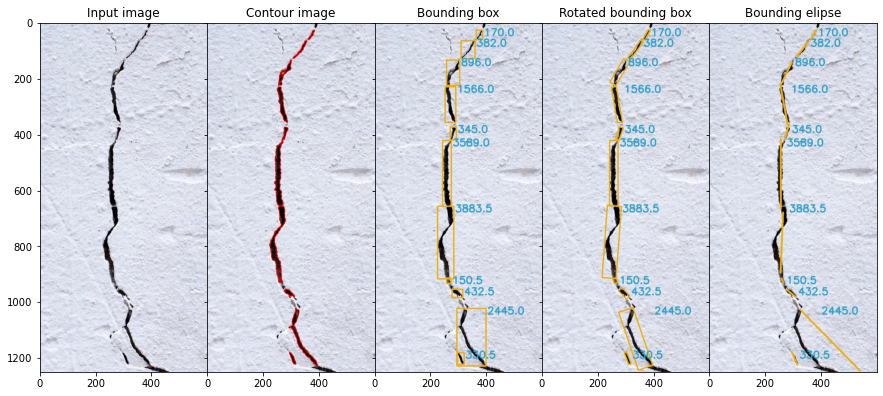

In [47]:
full_input_image = plt.imread(r'.\input_data\foundation_fracture1.jpg')
img_shape = {'height_start':0,'height_end':1250,
              'width_start':500,'width_end':1100}
input_image = crop_input_image(full_input_image,img_shape)
fruction_contours= extract_image_contours(input_image)
plot_bounding_shapes(input_image, fruction_contours)